_________________

# Imports
_________________

In [26]:
import torch
from utils import download_MNIST, convert_data_to_01, plot_digits, plot_original_vs_encoded
import torch.optim as optim

from models.autoencoder.autoencoder import  Autoencoder
from models.autoencoder.autoencoder_utils import train_autoencoder
from models.ebm.net import EnergyNet
from models.ebm.net_utils import langevin_MCMC, evaluate_ebm_model, train_ebm

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt


import torch
from torch.utils.data import TensorDataset, DataLoader


_________________

# Dataset
_________________

The binary data is stored at ::: ./data/MNIST_binary/
The binary data is stored at ::: ./data/MNIST_binary/


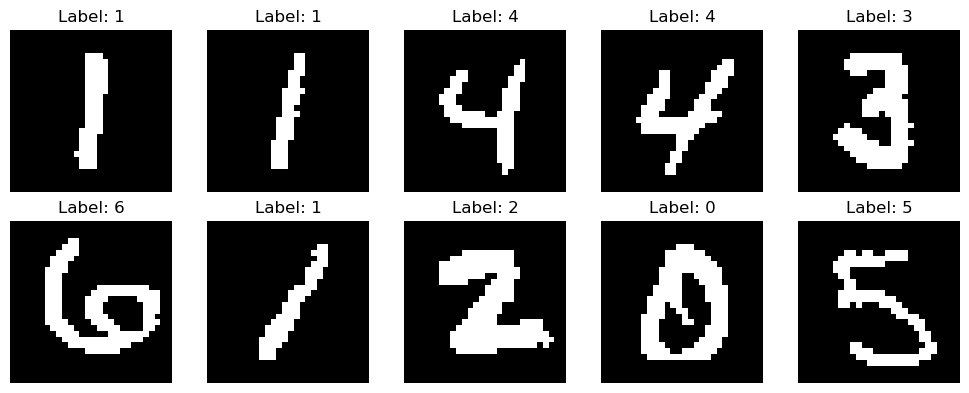

In [27]:
# Download MNIST Dataset
train_dataset, test_dataset = download_MNIST()

# Convert Dataset to 0/1 binary
convert_data_to_01(dataset=train_dataset, threshold=100, kind='train')
convert_data_to_01(dataset=test_dataset,  threshold=100, kind='test')

# Load 0/1 binary dataset
X_train  = torch.load('./data/MNIST_binary/X_train.pt').to(torch.float32) 
X_test   = torch.load('./data/MNIST_binary/X_test.pt').to(torch.float32)
Y_train, Y_test = torch.load('./data/MNIST_binary/Y_train.pt'), torch.load('./data/MNIST_binary/Y_test.pt')

# Visualise digits
plot_digits(X=X_test, Y=Y_test, n=10)

_________________________
# Autoencoder
_________________________


In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [29]:
autoencoder = Autoencoder(input_dim=28*28, hidden_dim=1024, encoded_dim=4)
autoencoder.to(device)

autoencoder.load_pretrained_model(model_ckpt_path='./saved_ckpts/autoencoder/autoencoder_09-06-2024_17:21:31.pth')

Model Loaded Sucessully


In [ ]:
#train_autoencoder(model=autoencoder, X_train=X_train, X_test=X_test, 
#                  lr=3e-4, num_epochs=30, batch_size=64, device=device)

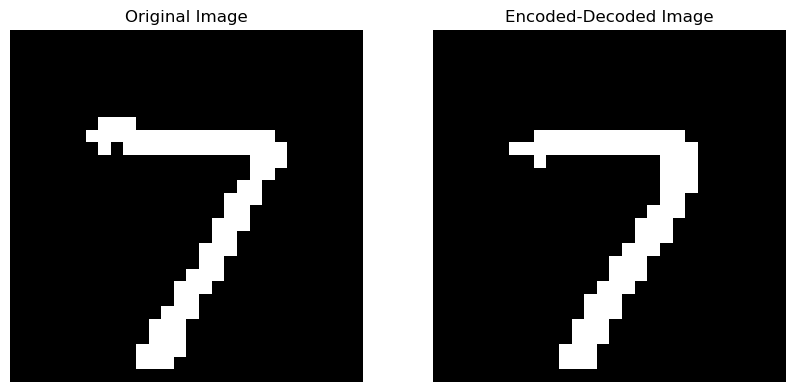

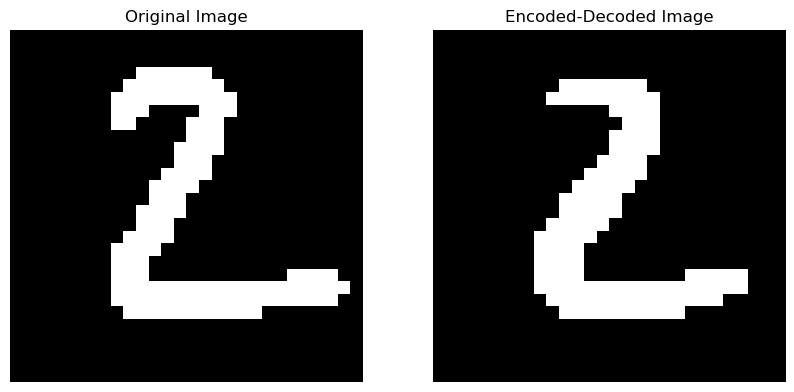

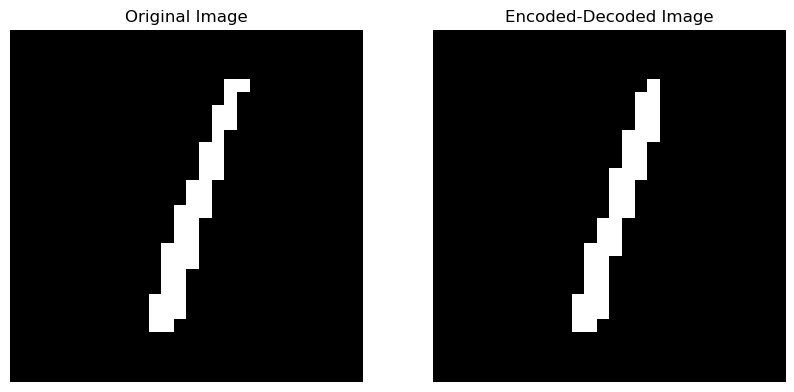

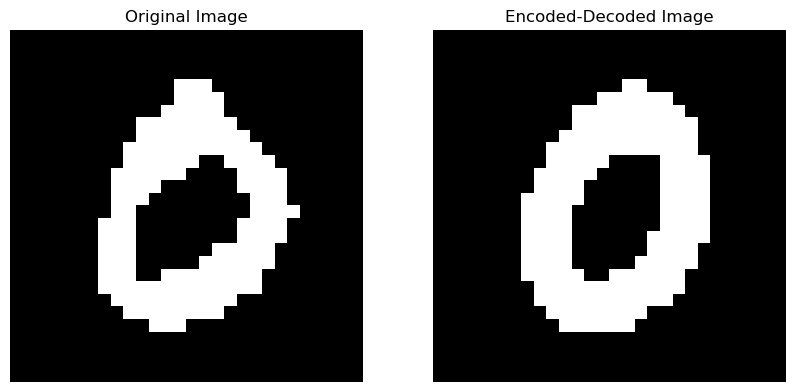

In [30]:
for idx in range(4):
    plot_original_vs_encoded(x=X_test[idx], model=autoencoder)

______________________________

# EBM
______________________________



In [31]:
energy_model = EnergyNet(in_dim=autoencoder.encoded_dim, hid_dim=8)
energy_model.to(device)

EnergyNet(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

_____________
_____________


In [32]:
train_ebm(energy_model=energy_model, autoencoder=autoencoder, X_train=X_train, X_test=X_test, 
          device=device, batch_size=1024, mcmc_samples_per_datapoint=8, num_epochs=3, lr=3e-4)


MODEL NAME : ebm_10-06-2024_10:22:24
############# EPOCH 1 STARTED TRAINING #############



RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x1024)

In [33]:
X_train = TensorDataset(X_train)
#train_dataloader = DataLoader(X_train, batch_size=1025, shuffle=True)   # Create a Train DataLoader


In [35]:
train_dataloader = DataLoader(X_train, batch_size=1025, shuffle=True)   # Create a Train DataLoader


In [37]:
for idx, batch in enumerate(train_dataloader):
    break

In [43]:
x = batch[0].to(device)                         # Send data to device
# with torch.no_grad():
# x = autoencoder.encoder(x)       

_______________________
_______________________


In [1]:
import gradio as gr

In [14]:
def greet(name):
    return "Hello " + name + ' !!!!! '

interface = gr.Interface(fn=greet, inputs='text', outputs='text')
interface.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


_____________________
_____________________


In [21]:
interface = gr.Interface(fn=greet, 
                         inputs=gr.Textbox(lines=1, placeholder='Enter the no of images to be generated'), 
                         outputs='text')

In [25]:
import gradio as gr
from PIL import Image, ImageDraw
import random

def generate_images(num_images):
    images = []
    for _ in range(num_images):
        # Create a random image
        img = Image.new('RGB', (200, 200), (255, 255, 255))
        draw = ImageDraw.Draw(img)
        # Generate random coordinates
        x0, y0 = random.randint(0, 200), random.randint(0, 200)
        x1, y1 = random.randint(0, 200), random.randint(0, 200)
        # Ensure x1 >= x0 and y1 >= y0
        x0, x1 = min(x0, x1), max(x0, x1)
        y0, y1 = min(y0, y1), max(y0, y1)
        # Draw a random colored rectangle
        draw.rectangle([x0, y0, x1, y1], fill=(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
        images.append(img)
    return images

iface = gr.Interface(
    fn=generate_images,
    inputs=gr.Number(label="Number of images"),
    outputs=gr.Gallery(label="Generated images")
)

iface.launch()


Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.
